# Extract samples for Marco

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')


In [4]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [5]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data (with tight cuts)

In [6]:
sa = SampleAugmenter(sample_dir + 'samples_tight.h5', debug=False)

17:13  
17:13  ------------------------------------------------------------
17:13  |                                                          |
17:13  |  MadMiner v0.1.0                                         |
17:13  |                                                          |
17:13  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
17:13  |                                                          |
17:13  ------------------------------------------------------------
17:13  
17:13  Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
17:13  Found 2 parameters:
17:13     cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
17:13     cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
17:13  Found 6 benchmarks:
17:13     sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
17:13     morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
17:13     morphing_basis_vect

## Sample

In [15]:
x, _ = sa.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=100000,
    folder=None,
    filename=None,
    test_split=None
)

17:16  Extracting plain training sample. Sampling according to ('theta', array([0., 0.]))
17:16  Effective number of samples: 4549.035975720517


In [36]:
labels = list(sa.observables)

In [37]:
indices = [0,1,4,5,6,7,8,9,10,11]

In [38]:
indices

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11]

In [49]:
for e, i in enumerate(indices):
    print(e, '->', labels[i])

0 -> et_miss
1 -> phi_miss
2 -> e_l1
3 -> pt_l1
4 -> eta_l1
5 -> phi_l1
6 -> e_a1
7 -> pt_a1
8 -> eta_a1
9 -> phi_a1


## Save data

In [46]:
x_ = x[:, indices]
x_.shape

(100000, 10)

In [47]:
np.save('samples_wulzercuts.npy', x_)

## Distributions

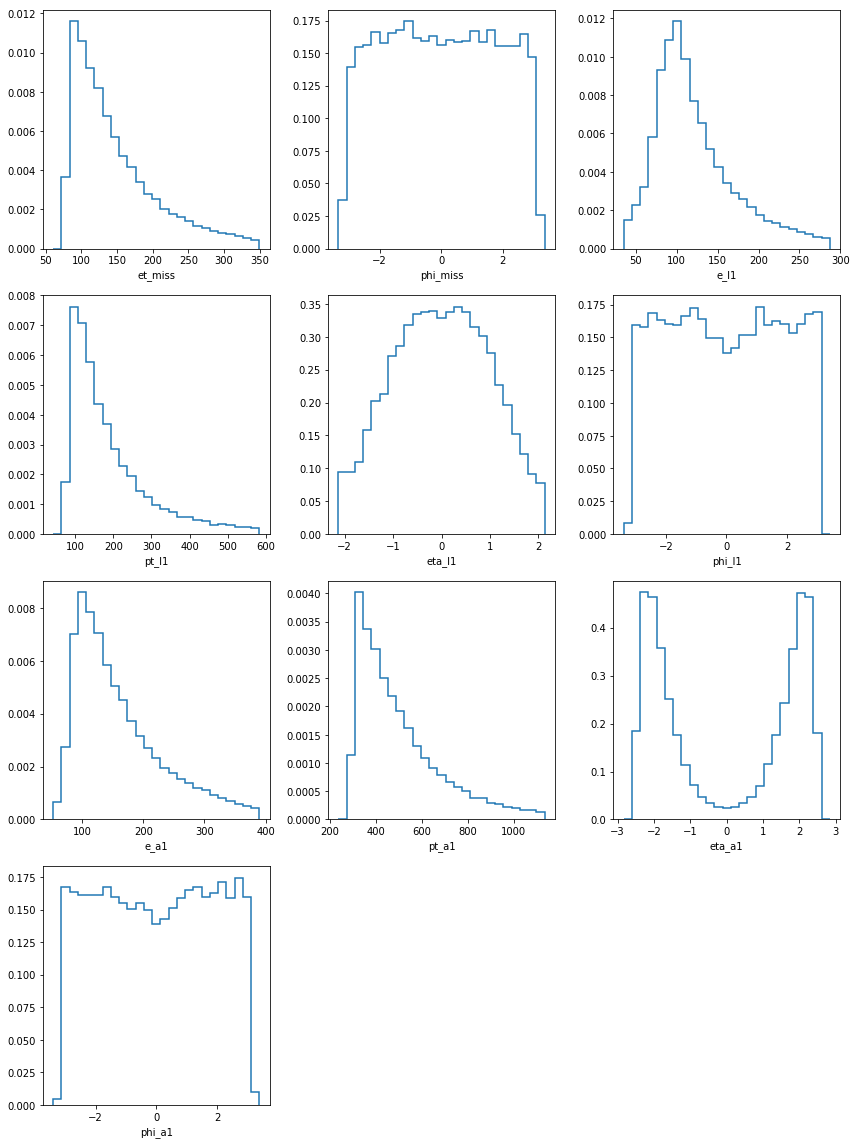

In [44]:
bins = 25
n_observables = len(indices)
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for k, i in enumerate(indices):
    label = labels[i]
    
    xmin = np.percentile(x[:,i], 5.)
    xmax = np.percentile(x[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, k+1)
       
    plt.hist(x[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'SM', density=True) 
        
    plt.xlabel(label)
    
plt.tight_layout()
#plt.savefig('observables.pdf')